# Temparature Prediction using ML


Temparature data is in data/IDCJAC001x_086338_1800_xxx
data/IDCJAC0010_086338_1800_max has max temperature
data/IDCJAC0011_086338_1800_min has min temperature

## The .csv file header  ##
**Station Details**

Bureau of Meteorology station number: 86338
Station name: MELBOURNE (OLYMPIC PARK)
Year site opened: 2013
Year site closed: 
Latitude (decimal degrees, south negative): -37.83
Longitude (decimal degrees, east positive): 144.98
Height of station above mean sea level (metres): 8
State: VIC

**Data File Format**

The data file format is shown below.

|Column | Explanation|
|--------|--------|
|1 |	Product code|
|2 |	Bureau of Meteorology station number|
|3 |	Year|
|4 |	Month|
|5 |	Day|
|6 |	Daily maximum/minimum temperature (degrees Celsius)|
|7 |	Period over which daily maximum temperature was measured (days)|
|8 |	Quality of daily maximum temperature|


** predict **
30 min time interval
24 hour Temperature, C
24 hour Load, kW
24 hour solar radiation, Insolation kW/m^2
   tarrif


**Important notes**

QUALITY FLAG DESCRIPTIONS

**Y**: completed quality control and acceptable \
**N**: not yet completed quality control process or date uncertain, quality not assure


## Reference Papers ##
https://ieeexplore.ieee.org/document/8993316

## tutorial to follow
https://medium.com/swlh/predicting-weather-temperature-change-using-machine-learning-models-4f98c8983d08

In [1]:
import pandas as pd
import typing
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
min_temp = pd.read_csv("data/outdoor_temp_data/IDCJAC0011_086338_1800_min/IDCJAC0011_086338_1800_Data.csv")
max_temp = pd.read_csv("data/outdoor_temp_data/IDCJAC0010_086338_1800_max/IDCJAC0010_086338_1800_Data.csv")

print("min temp shape: ", min_temp.shape, "\nmin temp columns: ", min_temp.columns)
print("max temp shape: ", max_temp.shape, "\nmax temp columns: ",  max_temp.columns)

min temp shape:  (3774, 8) 
min temp columns:  Index(['Product code', 'Bureau of Meteorology station number', 'Year', 'Month',
       'Day', 'Minimum temperature (Degree C)',
       'Days of accumulation of minimum temperature', 'Quality'],
      dtype='object')
max temp shape:  (3773, 8) 
max temp columns:  Index(['Product code', 'Bureau of Meteorology station number', 'Year', 'Month',
       'Day', 'Maximum temperature (Degree C)',
       'Days of accumulation of maximum temperature', 'Quality'],
      dtype='object')


In [3]:
def prepare_df_columns(df: pd.DataFrame, max: bool) -> pd.DataFrame:
    df = df.drop([], axis=1)
    df = df.dropna()
    df = df[min_temp.Quality == 'Y']
    if max:
        acc_label = 'Days of accumulation of maximum temperature'
    else:
        acc_label = 'Days of accumulation of minimum temperature'

    df = df.drop(['Quality', 'Product code', 'Bureau of Meteorology station number',acc_label], axis=1)
    return df

def prepare_combined_df(max_temp: pd.DataFrame, min_temp: pd.DataFrame, drop_year: bool) -> pd.DataFrame:
    # remove extra columns and remove invalid data
    _max_temp = prepare_df_columns(max_temp, True)
    _min_temp = prepare_df_columns(min_temp, False)
    print("min temp shape: ", _min_temp.shape, "\nmin temp columns: ", _min_temp.columns)
    print("max temp shape: ", _max_temp.shape, "\nmax temp columns: ",  _max_temp.columns)
    
    # merge the data
    combined_df = pd.merge(_max_temp, _min_temp, on=['Year', 'Month', 'Day'])
    ##combined_df['Date'] = pd.to_datetime(combined_df[['Year', 'Month', 'Day']])
    # set the new Date column as the index
    # combined_df.set_index('Date', inplace=True)
    # remove the Year, Month, and Day columns
    if(drop_year):
        combined_df.drop(['Year', 'Day'], axis=1, inplace=True)
    else:
        combined_df['Date'] = pd.to_datetime(combined_df[['Year', 'Month', 'Day']])
        combined_df.drop(['Year', 'Month' , 'Day'], axis=1, inplace=True)
        # combined_df.set_index('Date', inplace=True)
    return combined_df

In [4]:
combined_df = prepare_combined_df(max_temp, min_temp, True)
print(combined_df)
combined_df_date = prepare_combined_df(max_temp, min_temp, False)
combined_df_date

min temp shape:  (2918, 4) 
min temp columns:  Index(['Year', 'Month', 'Day', 'Minimum temperature (Degree C)'], dtype='object')
max temp shape:  (2918, 4) 
max temp columns:  Index(['Year', 'Month', 'Day', 'Maximum temperature (Degree C)'], dtype='object')
      Month  Maximum temperature (Degree C)  Minimum temperature (Degree C)
0         6                            15.7                            10.4
1         6                            14.8                            10.7
2         6                            15.0                            11.1
3         6                            14.6                            11.9
4         6                            17.3                            12.6
...     ...                             ...                             ...
2913      3                            18.3                            13.9
2914      3                            20.9                            15.5
2915      3                            18.5               

C:\Users\mukul\AppData\Local\Temp\ipykernel_24832\114204823.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[min_temp.Quality == 'Y']
C:\Users\mukul\AppData\Local\Temp\ipykernel_24832\114204823.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[min_temp.Quality == 'Y']
C:\Users\mukul\AppData\Local\Temp\ipykernel_24832\114204823.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[min_temp.Quality == 'Y']
C:\Users\mukul\AppData\Local\Temp\ipykernel_24832\114204823.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[min_temp.Quality == 'Y']


,Maximum temperature (Degree C),Minimum temperature (Degree C),Date
0,15.7,10.4,2013-06-02
1,14.8,10.7,2013-06-03
2,15.0,11.1,2013-06-04
3,14.6,11.9,2013-06-05
4,17.3,12.6,2013-06-06
...,...,...,...
2913,18.3,13.9,2023-03-27
2914,20.9,15.5,2023-03-28
2915,18.5,14.9,2023-03-29
2916,19.1,12.4,2023-03-30


C:\Users\mukul\AppData\Local\Temp\ipykernel_24832\3317849983.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix_date = combined_df_date.corr()


<Axes: >

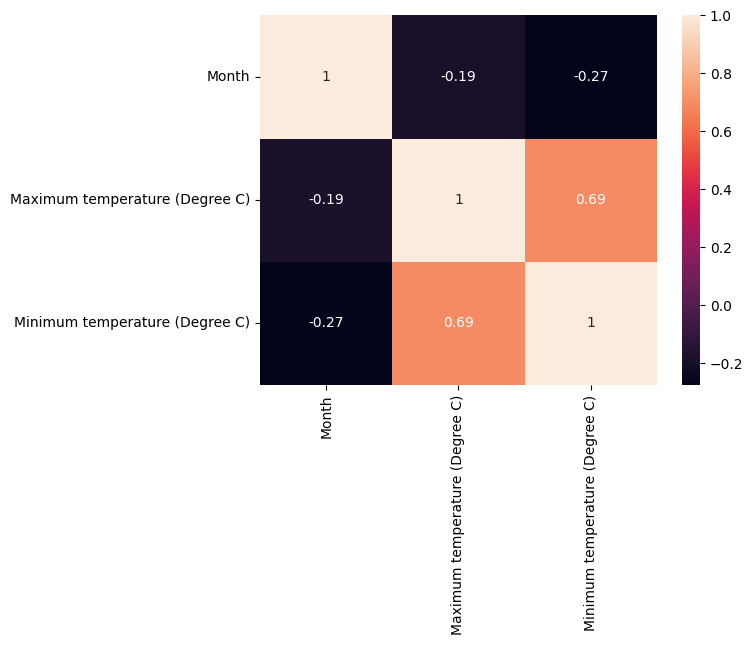

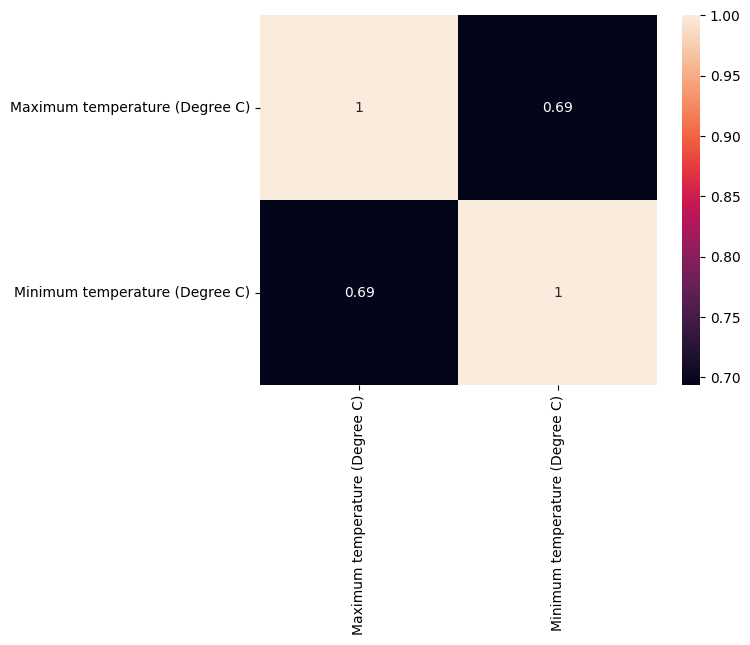

In [5]:
corrMatrix = combined_df.corr()
sns.heatmap(corrMatrix, annot= True)
plt.figure()
corrMatrix_date = combined_df_date.corr()
sns.heatmap(corrMatrix_date, annot=True)

In [6]:
# target vectors [maximum, minimum]
Y = combined_df.drop(["Month"], axis=1).to_numpy()
# feature matrix
X = combined_df["Month"].to_numpy().reshape(-1,1)

print(X.shape, Y.shape)

(2918, 1) (2918, 2)


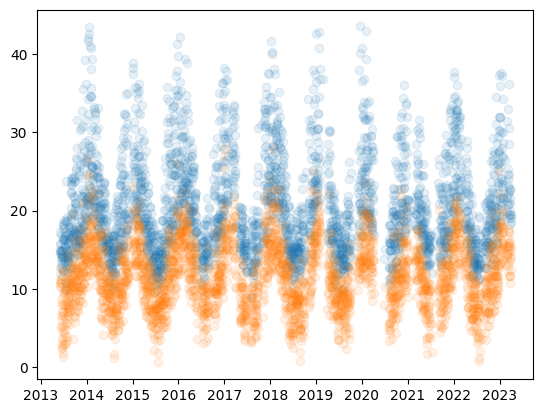

In [7]:
Y_date = combined_df_date.drop(["Date"], axis=1).to_numpy()
X_date = combined_df_date["Date"].to_numpy().reshape(-1,1)
plt.plot_date(X_date, Y_date, alpha=0.1)

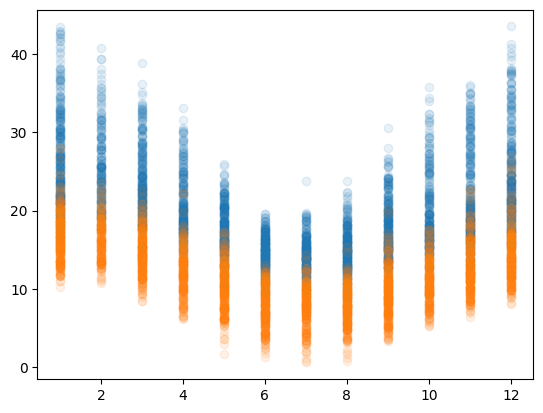

In [8]:
plt.scatter(X, Y[:,0], alpha = 0.1)
plt.scatter(X,Y[:,1], alpha = 0.1)


In [9]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
from sklearn.preprocessing import FunctionTransformer

## Linear Regression Model

In [125]:
def eval_accuracy(y_pred, y_test):
    accuracy = []
    for i in range(y_test.shape[1]):
        if(i==0):
            maxmin = 'max Temp: '
        else:
            maxmin = 'min Temp: '
        mape = mean_absolute_percentage_error(y_pred[:,i], y_test[:,i])
        accuracy.append(100-np.mean(mape))
        # print("Prediction accuracy for ", maxmin, 100-np.mean(mape))
    return accuracy

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin((2 * np.pi*x)/period))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos( (2 * np.pi*x)/period))

def get_train_test_splits(X,Y):
    tscv = TimeSeriesSplit()
    all_splits_index = list(tscv.split(X, Y))
    return tscv, all_splits_index

mae          4.043446
mse         27.298152
rmse         5.216432
r2           0.030470
baseline     4.107092
dtype: float64

Dataset with Dates

mae          4.331744
mse         29.515399
rmse         5.422680
r2          -0.054079
baseline     4.107092
dtype: float64


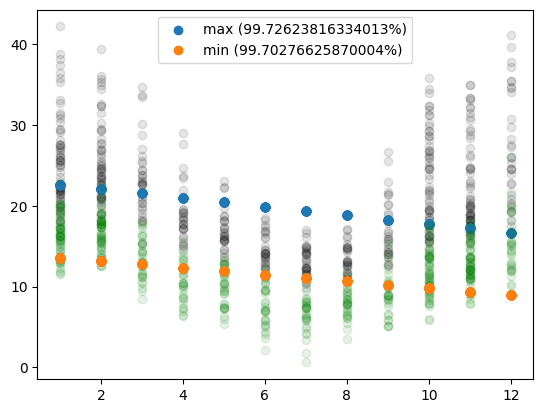

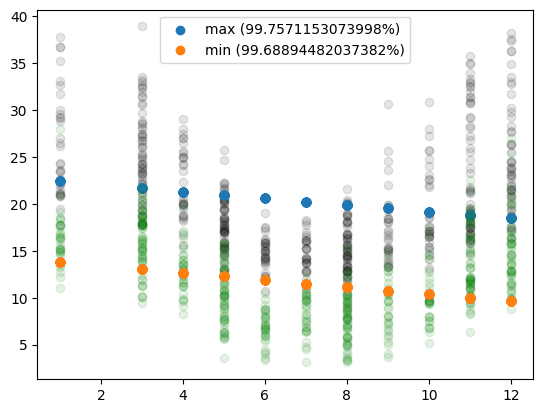

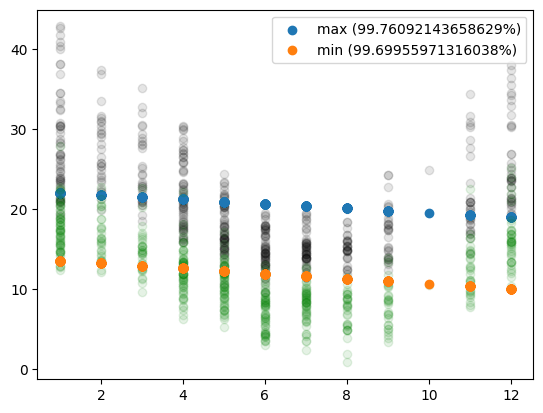

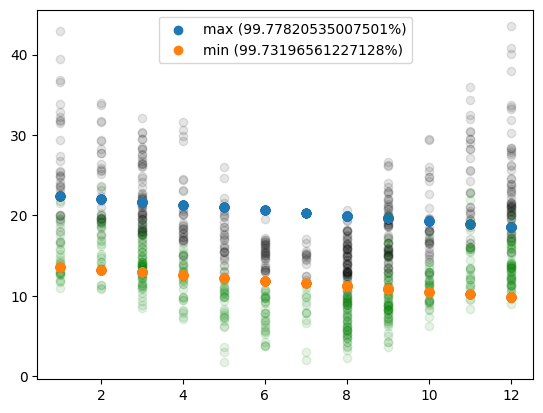

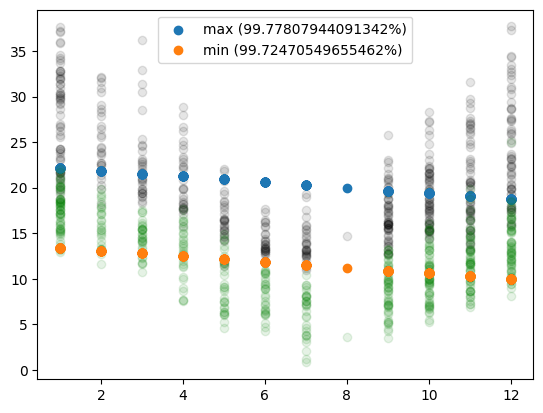

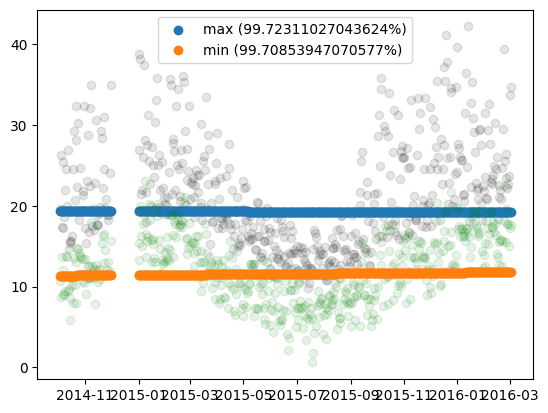

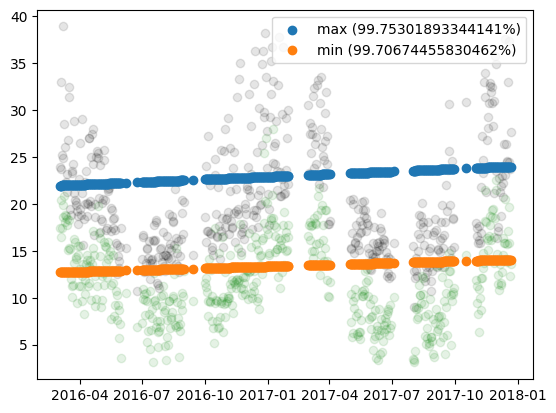

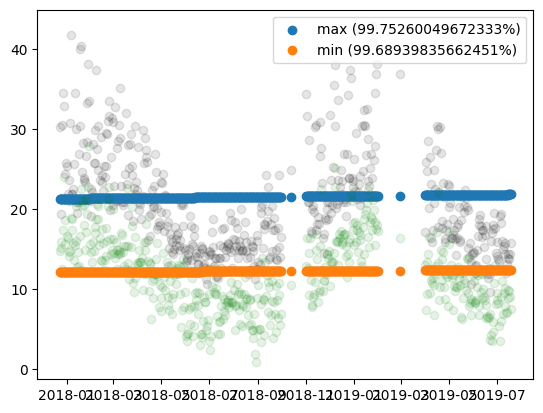

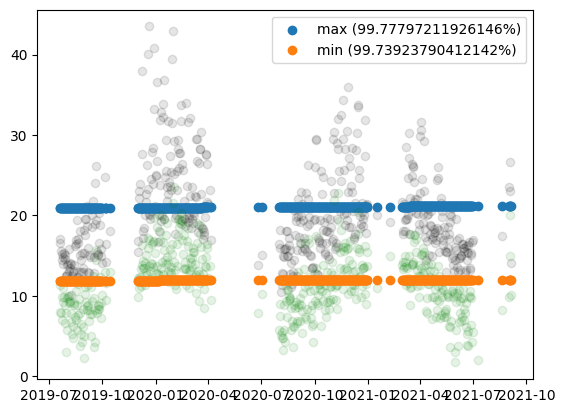

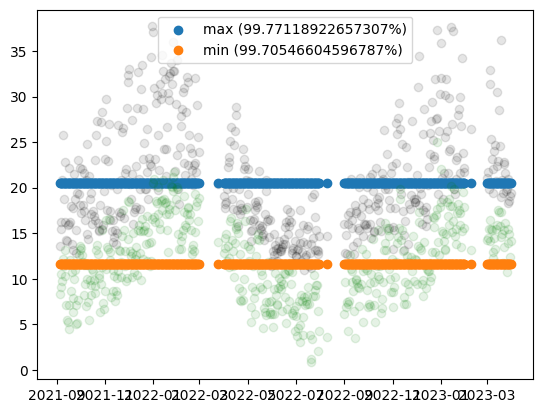

In [135]:
def apply_regression_analysis(X, Y):
    tscv = TimeSeriesSplit()
    all_splits = list(tscv.split(X, Y))
    
    eval_metrics = {'mae': [], 'mse': [], 'rmse':[], 'r2':[], 'baseline':[]}

    for (train, test) in all_splits:

        X_train, X_test = X[train], X[test]
        Y_train, Y_test = Y[train], Y[test]
        y_pred = [Y_train.mean(axis=0)]*len(Y_train)
        baseline = round(mean_absolute_error(Y_train, y_pred),5)
        eval_metrics['baseline'].append(baseline)
        # print('Baseline MAE: ', round(mean_absolute_error(Y_train, y_pred),5))

        ## Linear regression
        lm = make_pipeline(
            StandardScaler(),
            LinearRegression(),
        )
        # print(X_train.shape, Y_train.shape)
        lm.fit(X_train, Y_train)

        # print('Linear Regression Training MAE:', round(mean_absolute_error(Y_train, lm.predict(X_train)),5))
        y_pred = lm.predict(X_test)
        # print('Linear Regression Test MAE:', round(mean_absolute_error(Y_test, y_pred),5))
        accuracys = eval_accuracy(y_pred, Y_test)
        # print(accuracys)
        # # calculate metrics
        mae =  round(mean_absolute_error(Y_test, y_pred),5)
        eval_metrics['mae'].append(mae)
        mse = mean_squared_error(Y_test, y_pred)
        eval_metrics['mse'].append(mse)
        eval_metrics['rmse'].append(np.sqrt(mse))
        eval_metrics['r2'].append(r2_score(Y_test, y_pred))
        # print("Other Test metrics: ")
        # print("MSE:", mse)
        # print("RMSE:", rmse)
        # print("R2 score:", r2)
        plt.figure()
        minmax = ["max", "min"]
        minmax_c = ['black', 'green']
        for i in range(Y_test.shape[1]):
            plt.scatter(X_test, Y_test[:,i], alpha = 0.1, color=minmax_c[i])
            # Plot the data and label it according to the SVM
            plt.scatter(X_test, y_pred[:,i], label=f"{minmax[i]} ({accuracys[i]}%)")
        plt.legend()
    eval_pd = pd.DataFrame.from_dict(eval_metrics)
    print(eval_pd.mean())
        


apply_regression_analysis(X,Y)
print("\nDataset with Dates\n")
apply_regression_analysis(X_date,Y_date)

### Adding Trignometric Features

[324.2222222222222, -324.2222222222222]

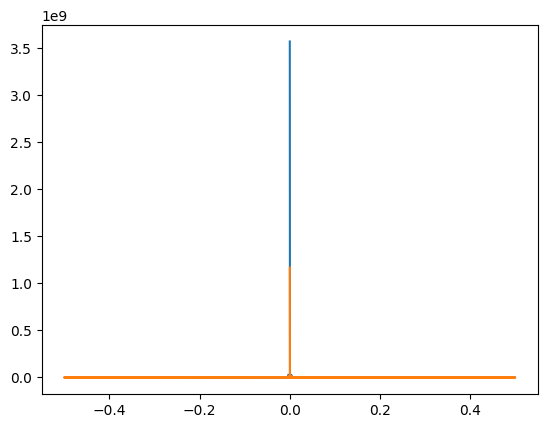

In [154]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate


def find_period(Y_date):
    periods=[]
    for i in range(Y_date.shape[1]):
        # Compute the FFT of the data
        fft = np.fft.fft(Y_date[:,i])

        # Compute the power spectrum (magnitude squared of the FFT)
        power_spectrum = np.abs(fft) ** 2

        # Compute the dominant frequency and corresponding period
        freq = np.fft.fftfreq(len(Y_date[:,0]), d=1)  # frequency bins
        idx = np.argmax(power_spectrum[1:]) + 1  # index of dominant frequency (excluding DC component)
        dominant_freq = freq[idx]  # dominant frequency
        periods.append(1 / dominant_freq)  # corresponding period
        plt.plot(freq, power_spectrum)
    return periods

find_period(Y_date)

cos transformer metrics mean: 
 mae      3.533700
mse     19.239655
rmse     4.386303
r2       0.251687
dtype: float64
sin transformer metrics mean: 
 mae      3.595750
mse     21.290825
rmse     4.614198
r2       0.190285
dtype: float64


C:\Users\mukul\AppData\Local\Temp\ipykernel_24832\3682520646.py:48: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  timestamp_array = (datetime_array - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\mukul\AppData\Local\Temp\ipykernel_24832\3682520646.py:48: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  timestamp_array = (datetime_array - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\mukul\AppData\Local\Temp\ipykernel_24832\3682520646.py:48: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  timestamp_array = (datetime_array - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\mukul\AppData\Local\Temp\ipykernel_24832\3682520646.py:48: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the f

cos transformer metrics mean: 
 mae      4.128070
mse     26.790488
rmse     5.175953
r2      -0.032209
dtype: float64
sin transformer metrics mean: 
 mae      3.298820
mse     17.129928
rmse     4.138832
r2       0.335897
dtype: float64


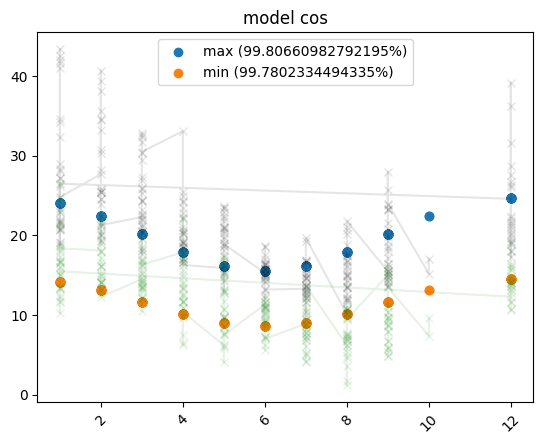

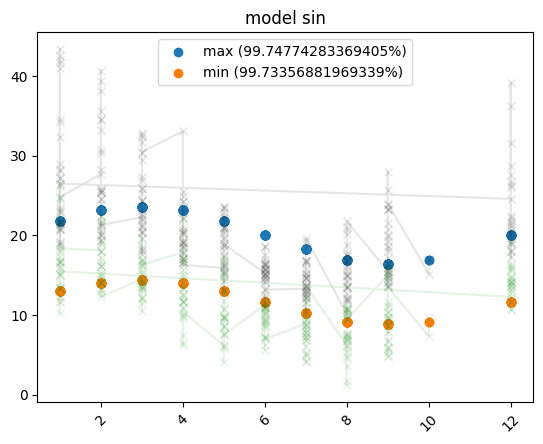

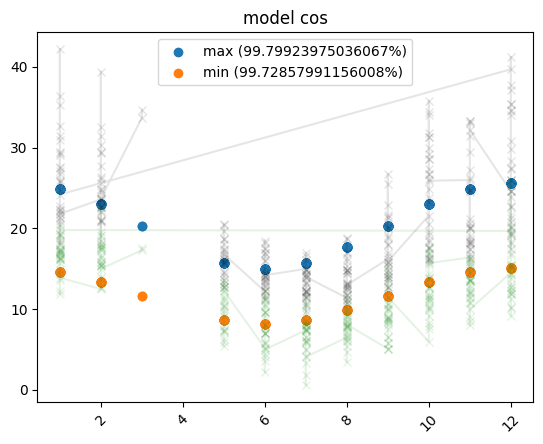

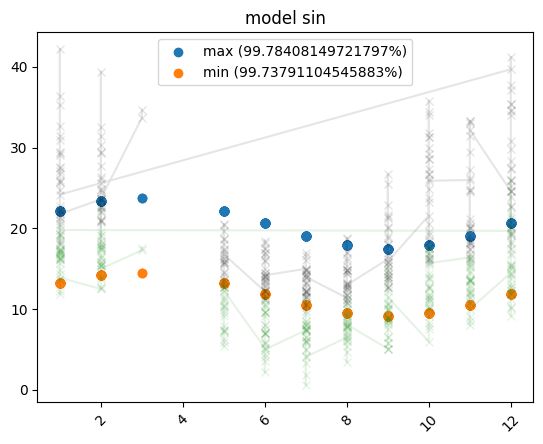

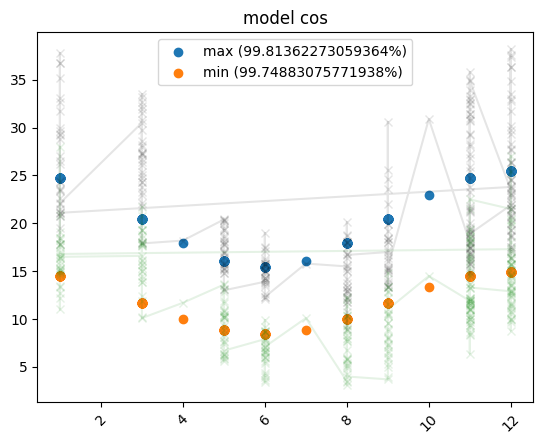

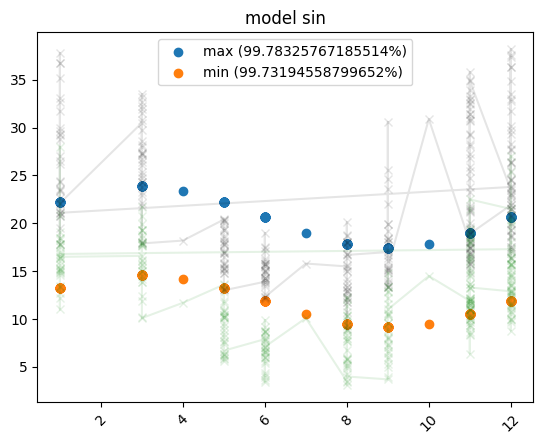

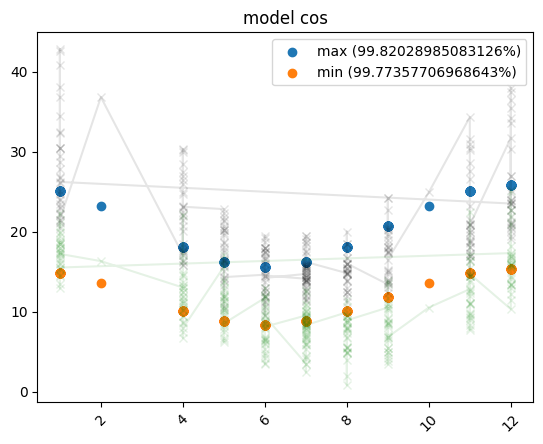

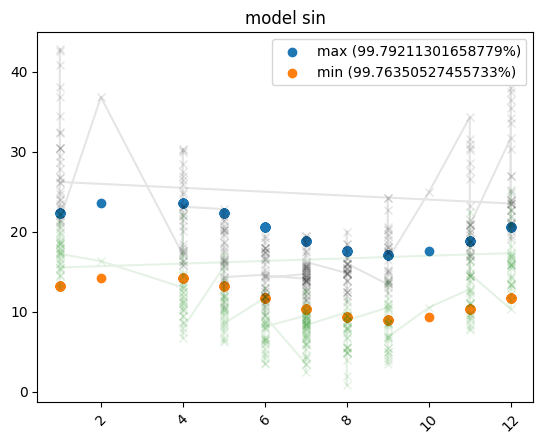

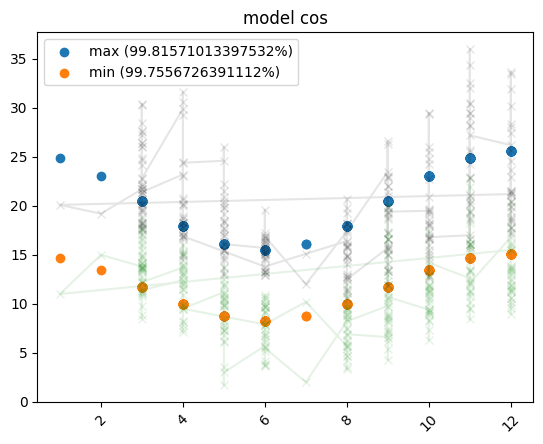

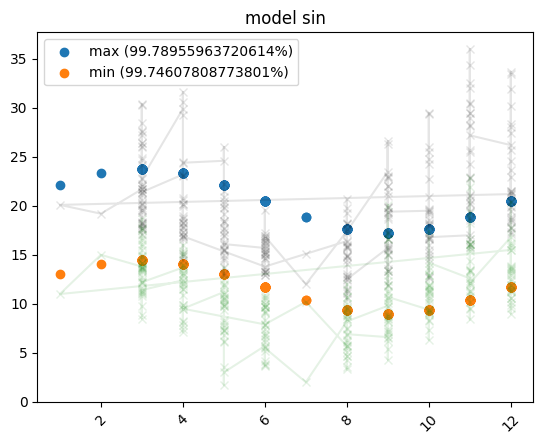

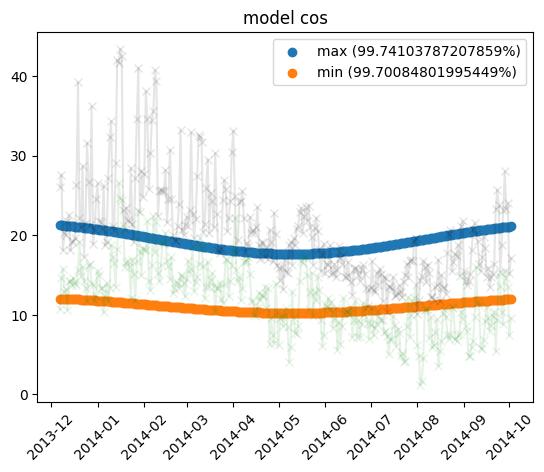

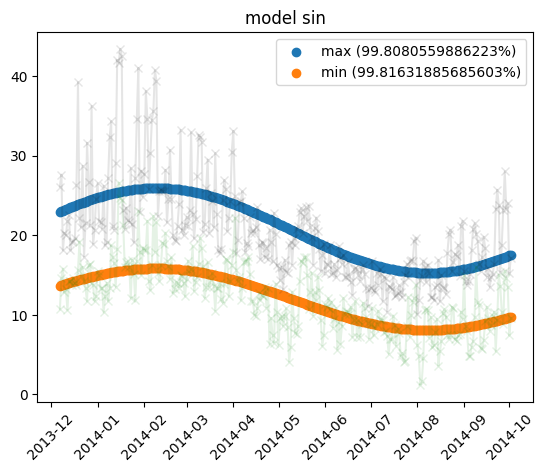

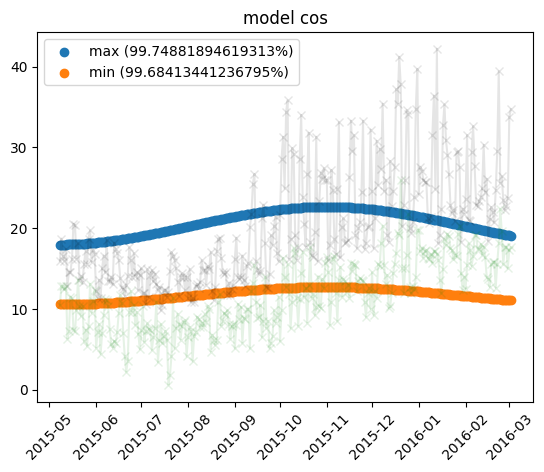

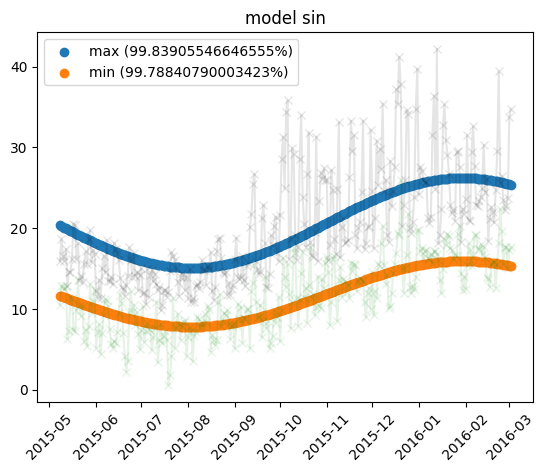

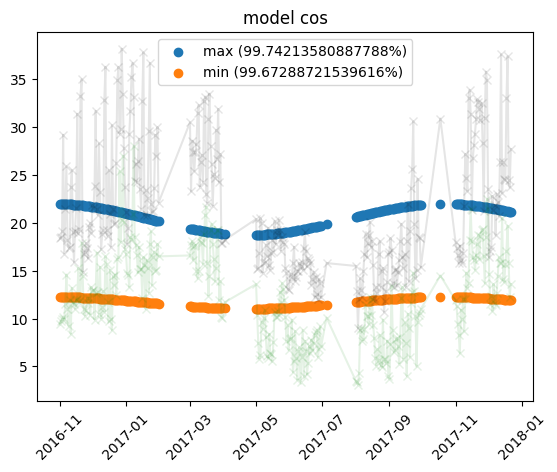

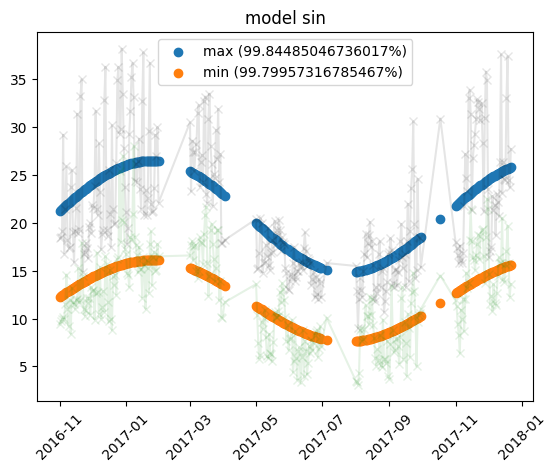

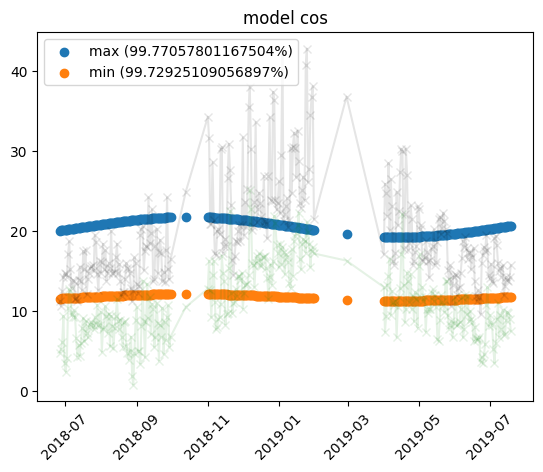

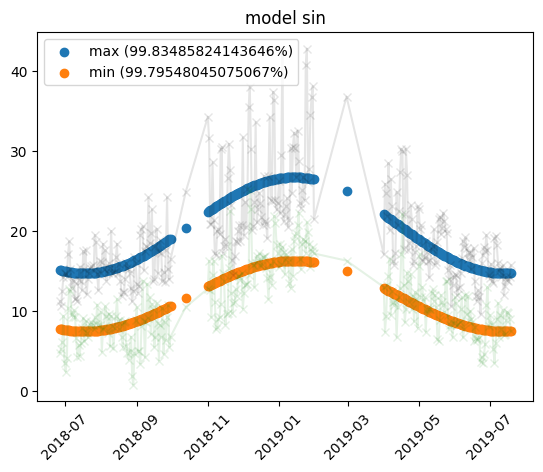

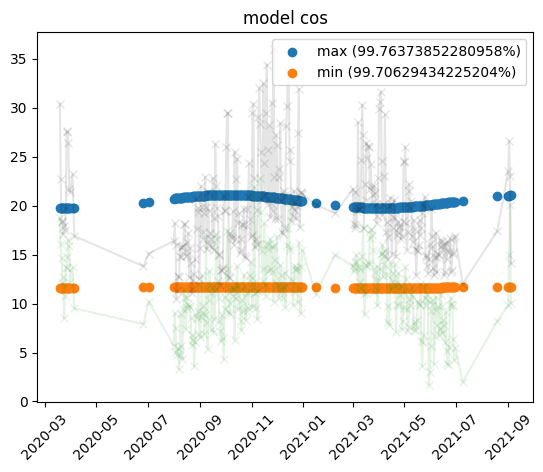

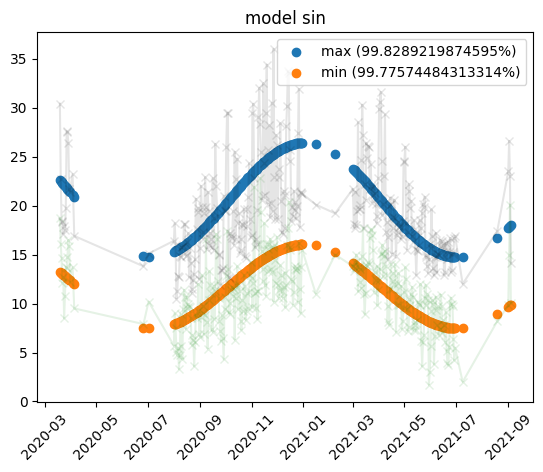

In [161]:
def apply_reg_model(model_func, X_train, X_test, X_test_org, Y_train_org, Y_train, Y_test, model_name):
    eval_metrics = {'mae': [], 'mse': [], 'rmse':[], 'r2':[]}
    # print(X_train.shape, Y_train.shape)
    model = model_func()
    model.fit(X_train, Y_train)
    # print(f'{model_name} Training MAE:', round(mean_absolute_error(Y_train, model.predict(X_train)),5))
    y_pred = model.predict(X_test)
    # print(f'{model_name} Test MAE:', round(mean_absolute_error(Y_test, y_pred),5))
    
    accuracys = eval_accuracy(y_pred, Y_test)
    # print(accuracys)
    mae =  round(mean_absolute_error(Y_test, y_pred),5)
    eval_metrics['mae'].append(mae)
    mse = mean_squared_error(Y_test, y_pred)
    eval_metrics['mse'].append(mse)
    eval_metrics['rmse'].append(np.sqrt(mse))
    eval_metrics['r2'].append(r2_score(Y_test, y_pred))
    y_pred = model.predict(X_train)

    plt.figure()
    minmax = ["max", "min"]
    minmax_c = ['black', 'green']
    for i in range(Y_test.shape[1]):
        plt.plot(X_test_org[-300:], Y_train_org[-300:,i],"x-", alpha = 0.1, color=minmax_c[i])
        plt.xticks(rotation=45)
        # Plot the data and label it according to the SVM
        plt.scatter(X_test_org[-300:], y_pred[-300:,i], label=f"{minmax[i]} ({accuracys[i]}%)")
    plt.title(model_name)
    
    plt.legend()
    return eval_metrics



def make_cyc_pipeline():
    alphas = np.logspace(-6, 6, 25)
    cyclicm = make_pipeline(
            StandardScaler(),
            RidgeCV(alphas=alphas),
    )
    return cyclicm

import pandas as pd

def convert_datetime_to_timestamp(datetime_array):
    datetime_array = np.asarray(datetime_array)
    if datetime_array.shape[1]== 1:
        timestamp_array = (datetime_array - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    else:
        timestamp_array = np.empty_like(datetime_array, dtype=int)
        for i in range(datetime_array.shape[1]):
            timestamp_array[:,i] = (datetime_array[:,i] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    return timestamp_array

def apply_transform_sinusoidal(X_test, X_train, Y_test, Y_train, isDate):
    if(isDate):
        period = [31104000]
        X_train_sin = sin_transformer(period[0]).fit_transform(convert_datetime_to_timestamp(X_train))
        X_train_cos = cos_transformer(period[0]).fit_transform(convert_datetime_to_timestamp(X_train))
        X_test_sin = sin_transformer(period[0]).fit_transform(convert_datetime_to_timestamp(X_test))
        X_test_cos = cos_transformer(period[0]).fit_transform(convert_datetime_to_timestamp(X_test))
    else:
        X_train_sin = sin_transformer(12).fit_transform(X_train)
        X_train_cos = cos_transformer(12).fit_transform(X_train)
        X_test_sin = sin_transformer(12).fit_transform(X_test)
        X_test_cos = cos_transformer(12).fit_transform(X_test)
    return X_train_sin, X_train_cos, X_test_sin, X_test_cos

def apply_featured_regression_analysis(X,Y, isDate:bool, model_gen_function):
    tscv = TimeSeriesSplit()
    all_splits = list(tscv.split(X, Y))
   
    # print(len(all_splits))
    eval_metrics = {'cos':{'mae': [], 'mse': [], 'rmse':[], 'r2':[]}, 
                    'sin': {'mae': [], 'mse': [], 'rmse':[], 'r2':[]}}
    
    
    for (train, test) in all_splits:
        X_train, X_test = X[train], X[test]
        Y_train, Y_test = Y[train], Y[test]

        X_train_sin, X_train_cos, X_test_sin, X_test_cos = apply_transform_sinusoidal(X_test, X_train, Y_test, Y_train, isDate)
        
        
        eval_metrics['cos'].update(apply_reg_model(model_gen_function,X_test_org=X_train, Y_train_org=Y_train,X_train=X_train_cos, X_test=X_test_cos, Y_train=Y_train, Y_test=Y_test, model_name="model cos"))
        eval_metrics['sin'].update(apply_reg_model(model_gen_function,X_test_org=X_train, Y_train_org=Y_train, X_train=X_train_sin, X_test=X_test_sin, Y_train=Y_train, Y_test=Y_test, model_name="model sin"))
    print("cos transformer metrics mean: \n", pd.DataFrame.from_dict(eval_metrics['cos']).mean())
    print("sin transformer metrics mean: \n", pd.DataFrame.from_dict(eval_metrics['sin']).mean())

        
        

apply_featured_regression_analysis(X,Y, False,  make_cyc_pipeline)
apply_featured_regression_analysis(X_date,Y_date, True, make_cyc_pipeline)

### General function to perform regression using a model and some transformation to data


In [ ]:
#### general functions to do regression 
## INPUT
#  X: np array
#  Y: np array
#  isDate: boolean, if the X is a datatime data
#  model_gen_function: function which returns the model pipeline we are using 
#                      e.g. make_pipeline(StandardScaler(), RidgeCV(alphas=alphas),)
#  data_transformation_function: function used to add non-linear features to the training and test data
#  model_name: name of this model 

def apply_featured_regression_analysis(X,Y, isDate:bool, model_gen_function, data_transformation_function, model_name):
    tscv = TimeSeriesSplit()
    all_splits = list(tscv.split(X, Y))
   
    # print(len(all_splits))
    eval_metrics = {'mae': [], 'mse': [], 'rmse':[], 'r2':[]}
                    
    
    
    for (train, test) in all_splits:
        X_train, X_test = X[train], X[test]
        Y_train, Y_test = Y[train], Y[test]

        X_test_, X_train_, Y_test_, Y_train_ = data_transformation_function(X_test, X_train, Y_test, Y_train, isDate)
        
        eval_metrics.update(apply_reg_model(model_gen_function,X_test_org=X_train,Y_train_org=Y_train,
                                            X_train=X_train_, X_test=X_test_, Y_train=Y_train_, 
                                            Y_test=Y_test_, model_name=model_name))
    print(f"{model_name} metrics mean: \n", pd.DataFrame.from_dict(eval_metrics.mean()))
    

### Periodic Spline Features

In [ ]:
alphas = np.logspace(-6, 6, 25)
def general_ridgeCV_model(alphas=alphas):
    return make_pipeline(
            MinMaxScaler(),
            RidgeCV(alphas=alphas),
            )
def  

## Random Forest Regressor 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor

def create_forest_model():
    forestModel = make_pipeline(
        SelectKBest(k="all"),
        StandardScaler(),
        RandomForestRegressor(
            n_estimators=100,
            max_depth=50,
            random_state=77,
            n_jobs=-1
        )
    )
    return forestModel

for i in range(2):
    forestModel = create_forest_model()
    y_train = Y_train[:,i]
    y_test = Y_test[:,i]
    if(i==0):
        maxmin = 'max'
    else:
        maxmin = 'min'

    forestModel.fit(X_train, y_train)
    print('Random Forest Regressor Model ',maxmin, ' Training MAE:', round(mean_absolute_error(y_train, forestModel.predict(X_train)),5))
    y_pred = forestModel.predict(X_test)
    print('Random Forest Regressor Model ', maxmin, ' Test MAE:', round(mean_absolute_error(y_test, forestModel.predict(X_test)),5))
    mape = mean_absolute_percentage_error(y_pred, y_test)
    print("Prediction accuracy for ", maxmin, 100-np.mean(mape))
    
    print("Other Test metrics: ")
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 score:", r2)
    print("\n")
    

Random Forest Regressor Model  max  Training MAE: 3.38109
Random Forest Regressor Model  max  Test MAE: 3.62733
Other Test metrics: 
MAE: 3.6273267666644076
MSE: 21.923326195679305
RMSE: 4.682235170907085
R2 score: 0.458569275338107
Prediction accuracy for  max 99.82712583348888
Random Forest Regressor Model  min  Training MAE: 2.2435
Random Forest Regressor Model  min  Test MAE: 2.24143
Other Test metrics: 
MAE: 2.241428142540721
MSE: 8.10037480019886
RMSE: 2.846115739072967
R2 score: 0.515340294681754
Prediction accuracy for  min 99.79505058708943


## Randomised Search

Random Forest best Regressor Model  max  Training MAE: 3.38109
Random Forest best Regressor Model  max  Test MAE: 3.62733
Prediction accuracy for  max 99.82712583348888
Other Test metrics: 
MAE: 3.627326766664407
MSE: 21.923326195679305
RMSE: 4.682235170907085
R2 score: 0.458569275338107




C:\Users\mukul\AppData\Local\Temp\ipykernel_28640\1371961324.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test, y_pred,  cmap = 'red')


Random Forest best Regressor Model  min  Training MAE: 2.24382
Random Forest best Regressor Model  min  Test MAE: 2.24248
Prediction accuracy for  min 99.79489095567253
Other Test metrics: 
MAE: 2.242478650319096
MSE: 8.103157460409184
RMSE: 2.8466045493551055
R2 score: 0.5151738032155193




C:\Users\mukul\AppData\Local\Temp\ipykernel_28640\1371961324.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test, y_pred,  cmap = 'red')


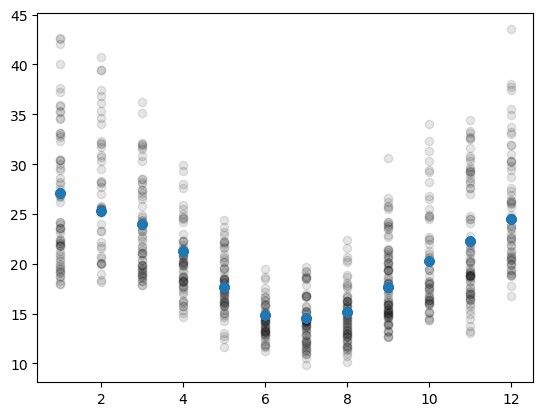

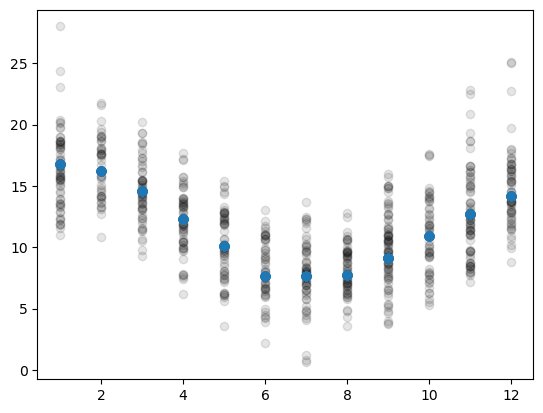

In [ ]:
from sklearn.model_selection  import RandomizedSearchCV


for i in range(2):
    forestModel = create_forest_model()
    y_train = Y_train[:,i]
    y_test = Y_test[:,i]
    if(i==0):
        maxmin = 'max'
    else:
        maxmin = 'min'

    params = {
        'selectkbest__k':  range(1, X_train.shape[1] + 1),
        'randomforestregressor__n_estimators': [50, 100, 150],
        'randomforestregressor__max_depth': [10, 20, 30, 40, 50]
    }
    rs = RandomizedSearchCV(forestModel,
                        param_distributions=params,
                        n_iter=5,
                        n_jobs=-1,
                        cv=10
                        )


    rs.fit(X_train, y_train)
    best_model = rs.best_estimator_

    print('Random Forest best Regressor Model ',maxmin, ' Training MAE:', round(mean_absolute_error(y_train, best_model.predict(X_train)),5))
    y_pred = best_model.predict(X_test)
    print('Random Forest best Regressor Model ', maxmin, ' Test MAE:', round(mean_absolute_error(y_test, best_model.predict(X_test)),5))
    mape = mean_absolute_percentage_error(y_pred, y_test)
    print("Prediction accuracy for ", maxmin, 100-np.mean(mape))
    plt.figure()
    plt.scatter(X_test, y_test, alpha = 0.1, color='black')
    # Plot the data and label it according to the SVM
    plt.scatter(X_test, y_pred,  cmap = 'red')
    
    print("Other Test metrics: ")
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 score:", r2)
    print("\n")



In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

ModuleNotFoundError: No module named 'pdpbox'

## Support Vector Machine


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import matplotlib.pyplot as plt

d:\mukul\anaconda3\envs\SOML\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best C: 0.1
Best gamma: 0.1


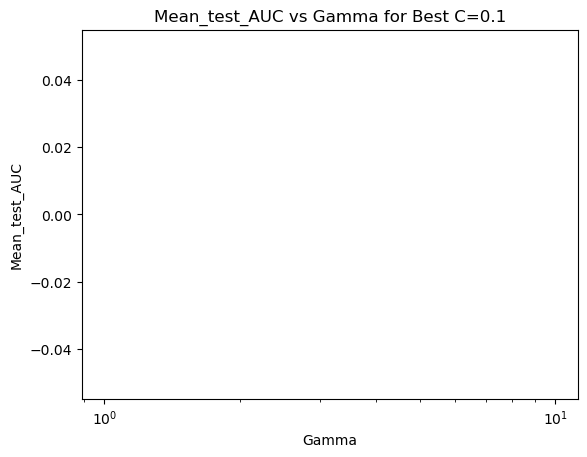

In [ ]:
# Define the parameter grid (C values and g values)
param_grid = {'C': [0.1, 1, 10, 100],
                'gamma': [0.1, 1, 10, 100]}
# Create an SVM model
svr_model = SVR(kernel='rbf')
# Create a grid search object with 5-fold cross-validation.
# The GridSearchCV function finds the combination of hyperparameters that produces
# the best performance on the training data.
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
# Train the grid search object using the training data
grid_search.fit(X_train, Y_train[:,0])
# Get the best hyperparameters from the grid search
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
# Print the best hyperparameters
print('Best C:', best_C)
print('Best gamma:', best_gamma)
# Get the mean_test_AUC scores for each gamma value and plot them
mean_test_AUC = grid_search.cv_results_['mean_test_score']
gamma_values = param_grid['gamma']
C_values = param_grid['C']
index_of_best_C = C_values.index(best_C)
mean_test_AUC_of_best_C = mean_test_AUC[index_of_best_C*len(gamma_values):(index_of_best_C+1)*len(gamma_values)]
# Plot the scores
plt.semilogx(gamma_values, mean_test_AUC_of_best_C)
plt.xlabel('Gamma')
plt.ylabel('Mean_test_AUC')
plt.title(f'Mean_test_AUC vs Gamma for Best C={best_C}')
plt.show()

Results for C=0.1:
Prediction accuracy for  min 99.81731377773967


C:\Users\mukul\AppData\Local\Temp\ipykernel_28640\3125760682.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test, y_pred,  cmap = 'red')


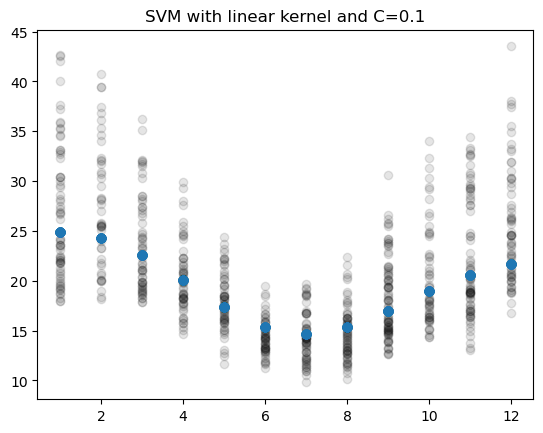

In [ ]:
C = 0.1
clf = SVR(kernel='rbf', C=C)
 # Train the SVM on the training data
clf.fit(X_train, Y_train[:,0])
 # Use the SVM on the test data
y_pred = clf.predict(X_test)

# Print the results for this C value
print(f"Results for C={C}:")
mape = mean_absolute_percentage_error(y_pred, Y_test[:,0])
print("Prediction accuracy for ", maxmin, 100-np.mean(mape))
 # Plot the SVM
plt.figure()
plt.title(f"SVM with linear kernel and C={C}")
# Plot the actual results to compare to (faded)
plt.scatter(X_test, Y_test[:,0], alpha = 0.1, color='black')
 # Plot the data and label it according to the SVM
plt.scatter(X_test, y_pred,  cmap = 'red')